In [1]:
import time
print("Last updated on ", time.asctime())

Last updated on  Sat Nov 17 21:26:42 2018


total events  281538.0 , accepted   164585.0 fraction (%) 58.45924884029864
time per file  1.032513701885903  s
time per event 0.05764661668213727 s

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import os
import time
import datetime

import tables            as tb
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib.dates  as md
import collections       as collections
import pandas            as pd

from   scipy import optimize
from  invisible_cities.core .core_functions import in_range

import krcal.utils.plt_functions          as krplot
import krcal.utils.hst_extend_functions   as hst

import csth.utils.cepeak                  as cpk
import csth.utils.cepeak_plot_functions   as cpkplot

In [4]:
# Plotting style
default_cmap = "jet"
figure_size  = 14, 8
font_size    = 14

plt.rcParams["figure.figsize"] =   figure_size
plt.rcParams[  "font.size"   ] =   font_size

In [5]:
run_number = 6341
trigger    = 'trigger2'
#input_filename = f"$IC_DATA/{run_number}/pmaps/edf_{run_number}_90_9188_{trigger}.h5"
input_filename = f"$IC_DATA/{run_number}/pmaps/cepks_{run_number}_0000_9999_6q0min.h5"
input_file     = os.path.expandvars(input_filename)
print(input_file)

/Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/cepks_6341_0000_9999_6q0min.h5


In [6]:
esum = cpk.esum_from_hdf(input_file)

In [8]:
edf = esum

In [10]:
sel_base = (edf.nslices > 0) & (edf.nhits > 0) & (edf.zmax < 550) & (edf.s1e >0)
edf = edf[sel_base]

edf.head()

,event,peak,location,nslices,nhits,noqslices,time,s1e,t0,rmax,...,q0,e0h,q0h,x,y,z,q,e,eh,qh
0,845271,0,2576,27,252,4,1537711844542,112.084930,482.091319,82.764727,...,8911.433594,129141.468750,5948.152344,51.316131,35.175933,180.933341,9975.248636,123576.225369,122877.950805,6658.221478
1,845361,0,2576,20,202,2,1537711846932,108.394913,567.647563,135.830777,...,8350.999023,111083.500000,5819.096191,-4.167944,-109.271286,88.347577,7952.716846,100704.977262,100624.393395,5541.567444
2,845375,0,2576,56,1448,3,1537711847225,569.189697,427.222266,212.249853,...,51848.937500,524879.125000,28293.519531,-87.493121,-109.200089,252.022420,53092.880094,540407.942378,540153.814711,28972.328313
4,845493,0,2576,22,255,2,1537711849878,77.697456,414.539800,60.415230,...,8786.870117,126031.085938,6150.997559,18.785265,-26.633901,247.081703,9569.556558,117636.038016,117138.156058,6698.894855
7,845511,0,2576,22,371,2,1537711850182,182.697769,596.522752,227.705951,...,14149.612305,134005.546875,10124.311523,179.289870,65.886802,61.826835,11212.864242,181724.504341,181697.304120,8023.013508


/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/numpy/lib/histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/numpy/lib/histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


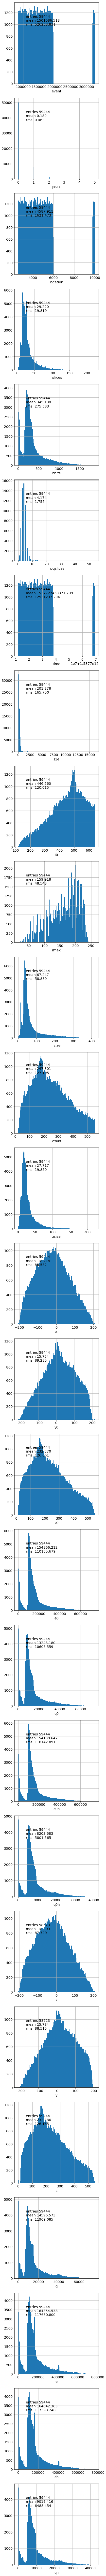

In [11]:
cpkplot.df(edf)

In [13]:
edf = esum
edf = edf.dropna()

pk  = edf.peak
E   = edf.e
Q   = edf.q
X   = edf.x
Y   = edf.y
R   = np.sqrt(X*X + Y*Y)
Z   = edf.z
ns  = edf.nslices
nh  = edf.nhits
S1e = edf.s1e
ts  = edf.time
t0  = edf.t0
zmax  = edf.zmax
zmin  = edf.zmax - edf.zsize
ZS    = edf.zsize
rmax  = edf.rmax
RS    = edf.rsize

In [14]:
sel = (zmin > 20) & (zmax < 530.) & (R < 160.)
print('number of candidates', np.sum(sel))
#sel = (Z > 50) & (Z < 500.) & (R < 160.)
print('number of candidates', np.sum(sel))


number of candidates 43568
number of candidates 43568


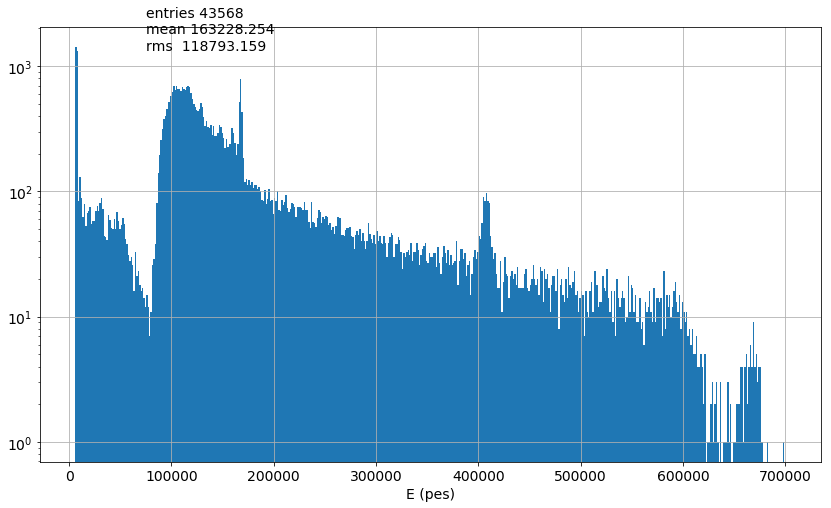

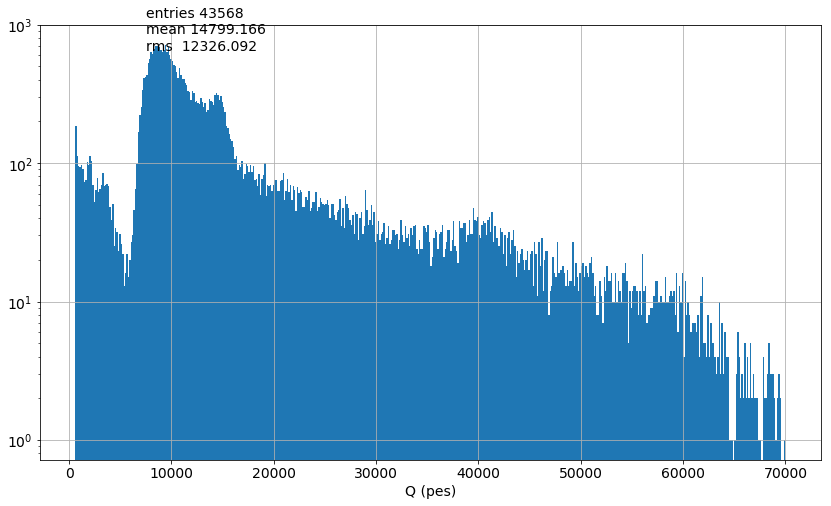

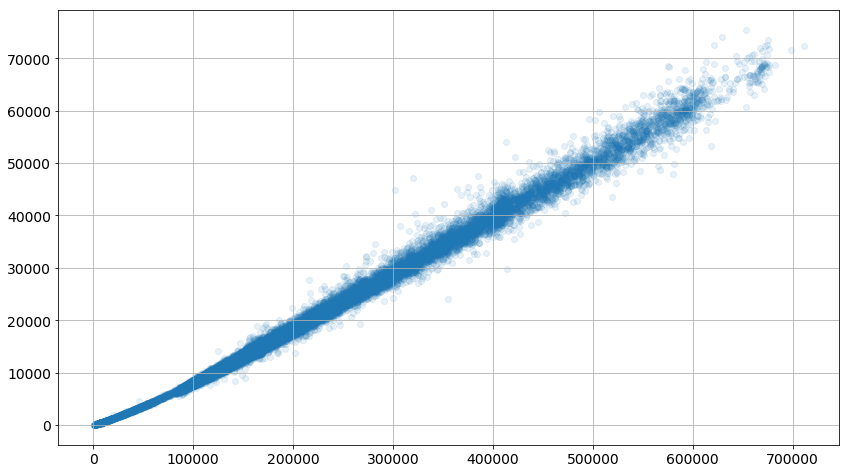

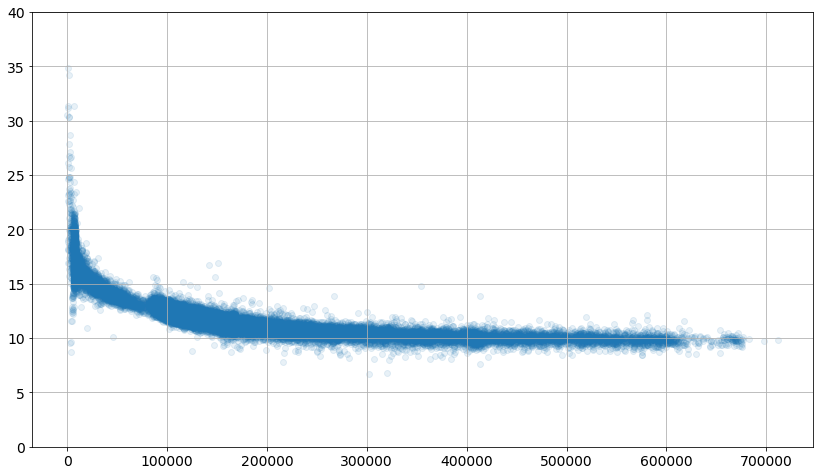

In [15]:
Ea  = hst.Vaxis((6.e3, 700.e3), 500)
Qa  = hst.Vaxis((6.e2, 700.e2), 500)
EQa = hst.Vaxis((0   ,  40),   100)
hst.hist(E[sel], Ea.bins);
plt.yscale('log')
plt.xlabel('E (pes)');
plt.grid()
hst.hist(Q[sel], Qa.bins);
plt.yscale('log')
plt.xlabel('Q (pes)');
plt.grid()
hst.scatter(E[sel], Q[sel], alpha = 0.1);
plt.grid()
hst.scatter(E[sel], E[sel]/Q[sel], alpha = 0.1);
plt.ylim(0, 40)
plt.grid();

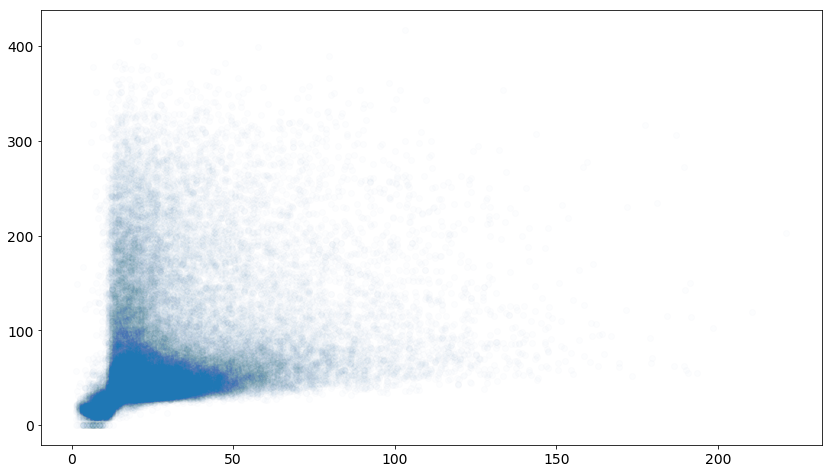

In [18]:
hst.scatter(ZS, RS, alpha = 0.01);

/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


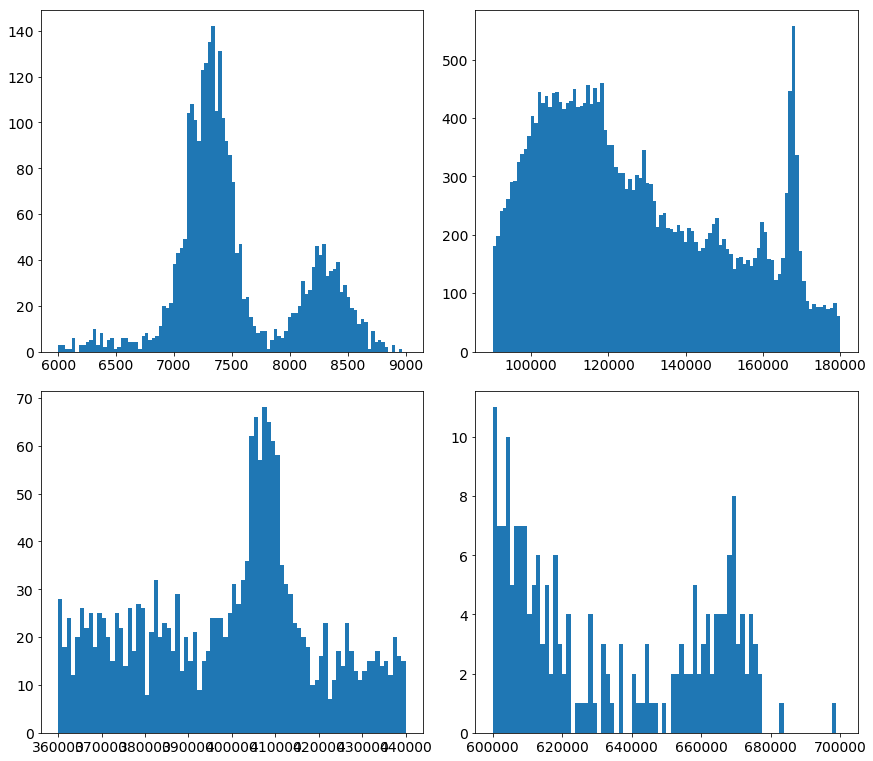

In [19]:
c    = hst.Canvas(2, 2)
c(1)
Exa = hst.Vaxis((6e3, 9.e3), 100)
plt.hist(E[sel], Exa.bins)
#plt.yscale('log')
c(2)
Eca = hst.Vaxis((90e3, 180e3), 100)
plt.hist(E[sel], Eca.bins);
#plt.yscale('log')
c(3)
Eda = hst.Vaxis((360e3, 440e3), 80)
plt.hist(E[sel], Eda.bins);
c(4)
Eta = hst.Vaxis((600e3, 700e3), 80)
plt.hist(E[sel], Eta.bins);
#plt.yscale('log')
#plt.yscale('log')
plt.tight_layout()

In [ ]:
x = (0, 3, 5)
y = (1, 6, 1)
z = zip(x, y)
z.sort()
print(z)

In [20]:
XYa = hst.Vaxis((-220., 220), 80)
Za  = hst.Vaxis((0., 550, 80))

/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


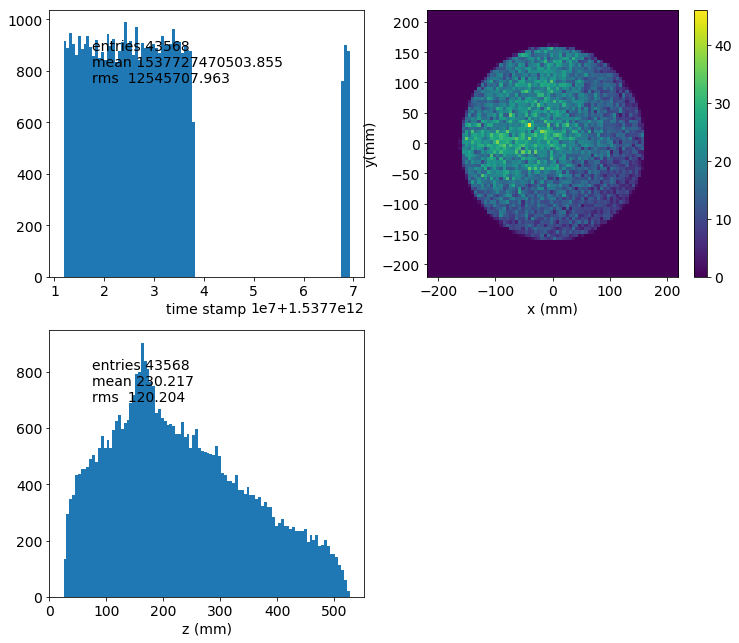

In [21]:
c = hst.Canvas(2, 2)
hst.hist(ts[sel], 100                          , canvas = c(1), xylabels=('time stamp', ''))
hst.hist2d(X[sel], Y[sel], (XYa.bins, XYa.bins), canvas = c(2), xylabels=('x (mm)', 'y(mm)'));
plt.colorbar();
hst.hist(Z[sel], 100                           , canvas = c(3), xylabels=('z (mm)', '' ));
#hst.hist(t0[sel], 100                          , canvas = c(4), xylabels=('t0 (us)', '' ));

In [22]:
def fun_gaus(x, A, mu, sig):
    return A * np.e**(-(x-mu)**2/(2*sig*sig)) 

def fun_gausline(x, A, mu, sig, a, b):
    return A * np.e**(-(x-mu)**2/(2*sig*sig)) + a*x + b

def guess_gaus(v):
    A, mu, sig = len(v), np.mean(v), np.std(v)
    return A, mu, sig

def guess_gausline(v):
    A, mu, sig = guess_gaus(v)
    y, x = np.histogram(v, 10)
    a, b = y[0], (y[-1]-y[0])/(x[-1]-x[0])
    return A, mu, sig, a, b
    
def chisq(F, popt, xdata, ydata):
    return np.sum((F(xdata, *popt)-ydata)**2/((len(xdata)-len(popt))*ydata))

def fit_fun(x, y, fun, guess):
    popt, pcov = optimize.curve_fit(fun, x, y, p0 = guess, sigma = np.sqrt(y))
#                                    bounds=([-np.inf, 0, -np.inf, -np.inf, 0.], 5*[np.inf, ]))
#    Eph, sig, A, m, c = popt[0], popt[1], popt[2], popt[3], popt[4]
    return popt

def text_fitgaus(mu, sig, chi2):
    t = (r"$\mu$ : {}"     .format(round(mu, 1)) + 
         "\n" + "$\sigma$ : {}" .format(round(sig, 1))  +
         "\n" + r"FWHM : {}"    .format(round(sig / mu * 235, 2)) + 
         "\n" + r"$\chi^2$ : {}".format(round(chi2,2))) 
    return t
    
def rel_pos(xcenters, yvals, x0=0.75, y0 = 0.6):
    xi = x0 * (np.max(xcenters)-np.min(xcenters)) + np.min(xcenters)
    yi = y0 * (np.max(yvals)-np.min(yvals))       + np.min(yvals)
    return xi, yi

In [23]:
def plot_gausline(V, xbins, comment=''):
    
    dys, dxs = np.histogram(V, xbins)
    guess = guess_gausline(V)
    plt.hist(V, xbins)
    
    #print('guess parameters    :', guess)
    xcenters = 0.5*(xbins[:-1]+xbins[1:])
    phat = fit_fun(xcenters, dys, fun_gausline, guess)
    plt.plot(dxs, fun_gausline(dxs, *phat), lw=3, ls='--')
    plt.xlabel('E (pes)')
    plt.title(comment)
    #print('estimated parameters: ', phat)
    chi2 = chisq(fun_gausline, phat, xcenters, dys)
    #print('chi2$: ', chi2)

    x0, y0 = rel_pos(xcenters, dys)
    text   = text_fitgaus(phat[1], phat[2], chi2)
    #print(text)
    plt.text(x0, y0, text, fontsize = 11);
    return xcenters, phat, chi2

In [24]:
def plot_fit_multiple_peaks(Ea, Erange_peaks, sel):
    xsel = in_range(E, *Ea.range) & sel

    plt.hist(E[xsel], Ea.bins, alpha = 0.5);
    plt.xlabel('E (pes)')
    ys, xes = np.histogram(E[xsel], Ea.bins)

    def _grange(eini, eend):

        Eka   = hst.Vaxis( (eini, eend), 100)
        xkrsel = in_range(Ea.centers, *Eka.range)
        ekrsel = (in_range(E, *Eka.range)) & sel
        guess = guess_gausline(E[ekrsel])
        krphat = fit_fun(Ea.centers[xkrsel], ys[xkrsel], fun_gausline, guess)
        xx = Ea.centers[xkrsel]
        mu, sig, = krphat[1], abs(krphat[2])
        t = r"$\mu$ : {}".format(round(mu, 1))+ "\t $\sigma$ : {}".format(round(sig, 1))+"\t FWHM : {}".format(round(sig / mu * 235, 2))
        print(t)
        plt.plot(xx, fun_gausline(xx, *krphat), lw=2, ls='--', label = t)

    for ierange in Erange_peaks:
        _grange(*ierange)

    plt.legend();

In [25]:
def plot_E_vs_vars(Ea, sel):
    c = hst.Canvas(3, 2)
    xsel = in_range(E, *Ea.range) & sel
    nbins = Ea.nbins
    eini, eend = Ea.range
    c(1)
    plt.hist2d(Z[xsel], E[xsel], (100, nbins), ((0, 550.), (eini, eend)) );
    plt.xlabel('z (mm)')
    plt.ylabel('E (pes)')
    plt.grid()
    c(2)
    plt.hist2d(R[xsel], E[xsel], (100, nbins), ((0, 220.), (eini, eend)) );
    plt.xlabel('r (mm)')
    plt.ylabel('E (pes)')
    plt.grid()
    c(3)
    plt.hist2d(X[xsel], E[xsel], (100, nbins), ((-200., 200.), (eini, eend)));
    plt.xlabel('x (mm)')
    plt.ylabel('E (pes)')
    plt.grid()
    c(4)
    plt.hist2d(Y[xsel], E[xsel], (100, nbins), ((-200., 200.), (eini, eend)));
    plt.xlabel('y (mm)')
    plt.ylabel('E (pes)')
    plt.grid()
    c(5)
    plt.hist2d(ts[xsel], E[xsel], (100, nbins), ((ts.min(),ts.max()), (eini, eend)));
    plt.xlabel('time (s)')
    plt.ylabel('E (pes)')
    plt.grid()
    plt.tight_layout()

In [26]:
def plot_E_vs_N(Ea, NSa, NHa, sel):
    c = hst.Canvas(1, 2)
    #eini, eend = 6e3, 12e3
    xsel = in_range(E, *Ea.range) & sel
    c(1)
    plt.hist2d(ns[xsel], E[xsel], (NSa.bins, Ea.bins));
    plt.xlabel('number of slices')
    plt.ylabel('E (pes)')
    plt.grid()
    c(2)
    plt.hist2d(nh[xsel], E[xsel], (NHa.bins, Ea.bins));
    plt.xlabel('number of hits')
    plt.ylabel('E (pes)')
    plt.grid()
    plt.tight_layout()

In [27]:
def plot_N_vs_Z(Ea, Za, NSa, NHa, sel):
    c = hst.Canvas(1, 2)
    #eini, eend = 6e3, 12e3
    xsel = in_range(E, *Ea.range) & sel
    c(1)
    plt.hist2d(Z[xsel], ns[xsel], (Za.bins, NSa.bins) );
    plt.ylabel('number of slices')
    plt.xlabel('z (mm)')
    plt.grid()
    c(2)
    plt.hist2d(Z[xsel], nh[xsel], (Za.bins, NHa.bins) );
    plt.ylabel('number of hits')
    plt.xlabel('z (mm)')
    plt.grid()
    plt.tight_layout()

In [28]:
def plot_RS_vs_ZS(Ea, ZSa, RSa, sel):
    c = hst.Canvas(3, 2)
    #eini, eend = 6e3, 12e3
    xsel = in_range(E, *Ea.range) & sel
    c(4)
    plt.hist2d(ZS[xsel], RS[xsel], (ZSa.bins, RSa.bins) );
    plt.ylabel('radius size (mm)')
    plt.xlabel('z  size(mm)')
    plt.grid()
    c(2)
    plt.hist(RS[xsel], RSa.bins)
    plt.xlabel('base radius (mm)')
    plt.grid()
    c(3)
    plt.hist(ZS[xsel], ZSa.bins)
    plt.xlabel('z (mm)')
    plt.grid()
    c(5)
    plt.hist2d(Z[xsel], ZS[xsel], (Za.bins, ZSa.bins))
    plt.xlabel('z (mm)')
    plt.ylabel('z-size (mm)')
    plt.grid()
    c(6)
    plt.hist2d(Z[xsel], RS[xsel], (Za.bins, RSa.bins))
    plt.xlabel('z (mm)')
    plt.ylabel('r-size (mm)')
    plt.grid()
    plt.tight_layout()

## X-rays

$\mu$ : 8303.5	 $\sigma$ : 187.1	 FWHM : 5.29
$\mu$ : 7311.7	 $\sigma$ : 183.0	 FWHM : 5.88


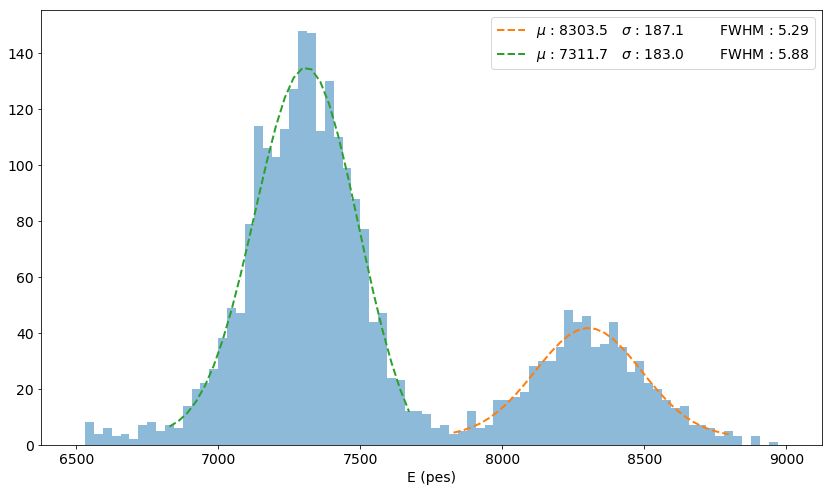

In [29]:
xEa  = hst.Vaxis( (6.5e3, 9.e3), 80)
peaks = ((7.8e3, 8.8e3), (6.8e3, 7.7e3) )
plot_fit_multiple_peaks(xEa, peaks, sel)

/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


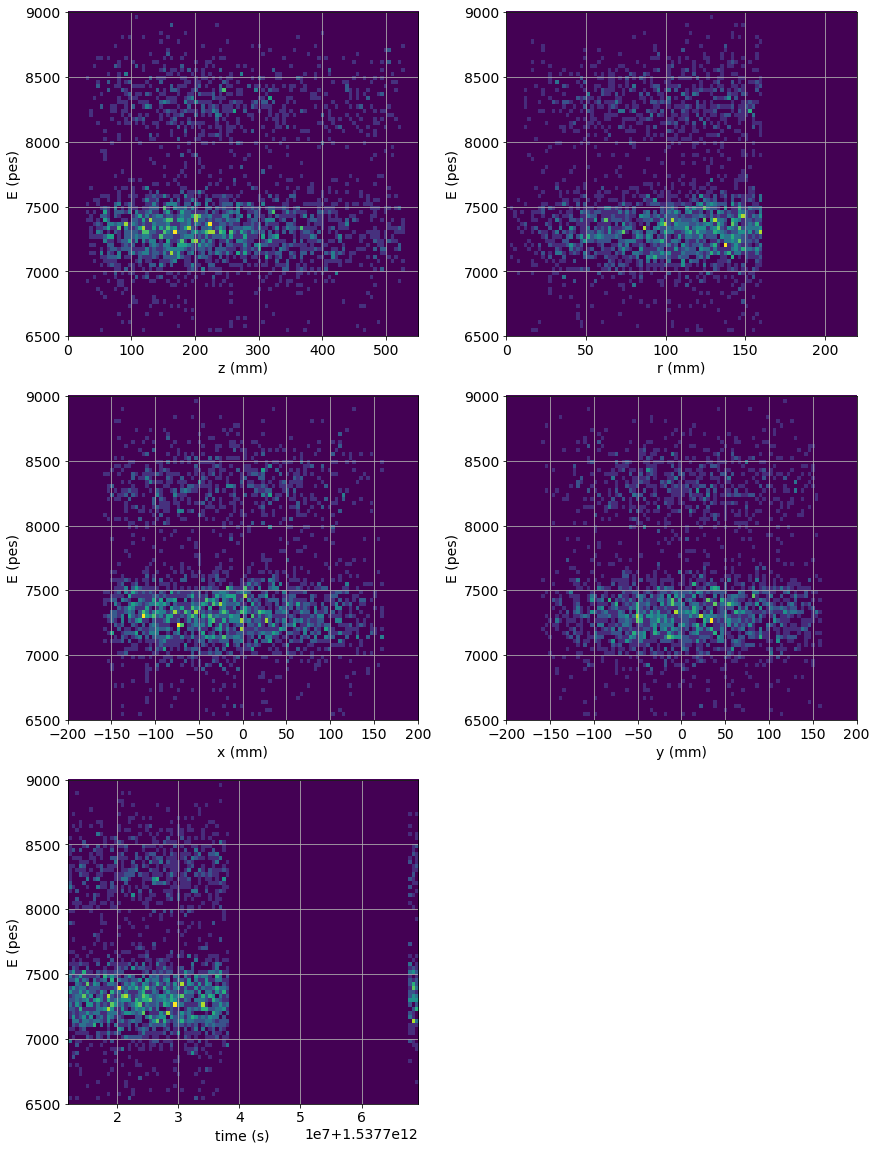

In [30]:
plot_E_vs_vars(xEa, sel)

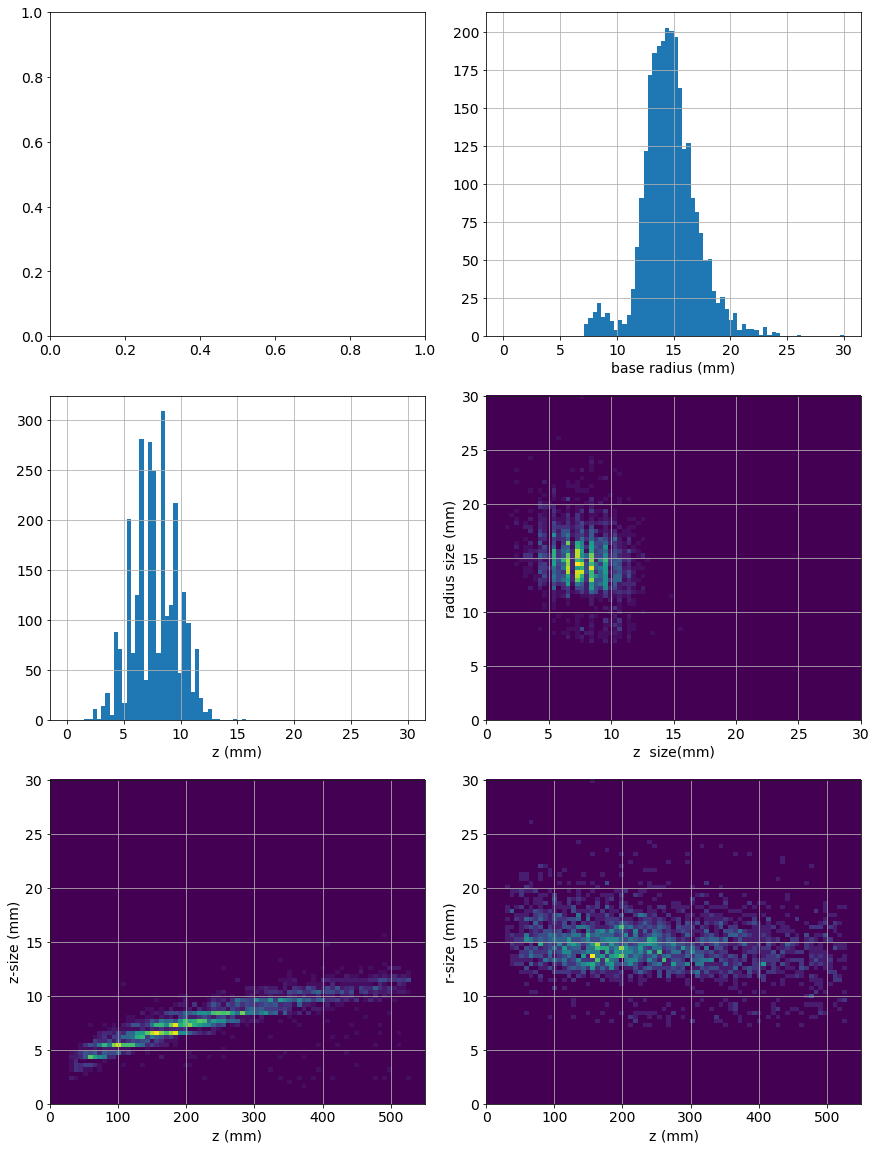

In [31]:
xRSa  = hst.Vaxis((0., 30), 80)
xZSa  = hst.Vaxis((0., 30), 80)
plot_RS_vs_ZS(xEa, xRSa, xZSa, sel)

/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


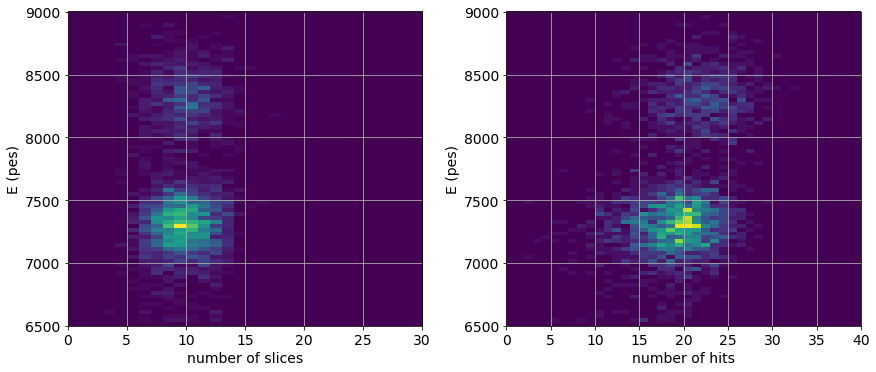

In [32]:
xNSa = hst.Vaxis( (0, 30), 30)
xNHa = hst.Vaxis( (0, 40), 40)
plot_E_vs_N(xEa, xNSa, xNHa, sel)

/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


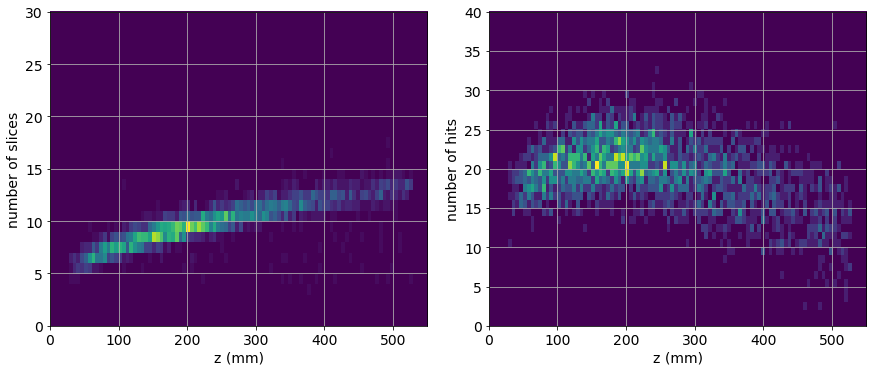

In [33]:
Za = hst.Vaxis( (0., 550.), 100)
plot_N_vs_Z(xEa, Za, xNSa, xNHa, sel)

## Cs

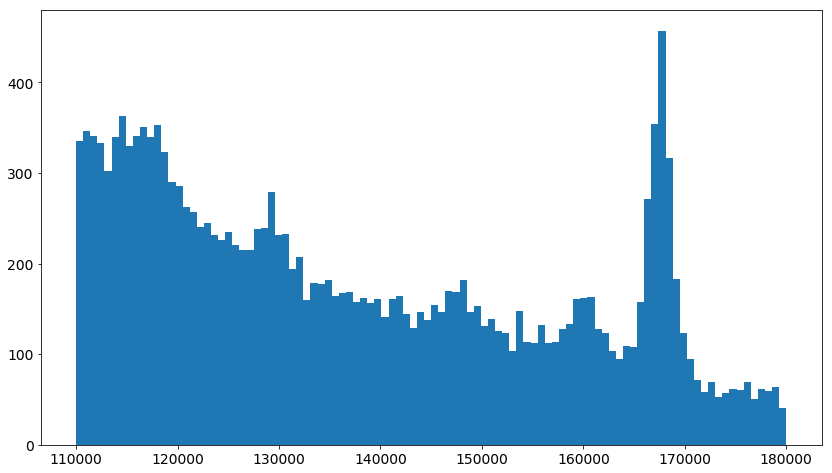

In [34]:
plt.hist(E[sel], 100, (110e3, 180e3));

$\mu$ : 167604.4	 $\sigma$ : 1045.1	 FWHM : 1.47
$\mu$ : 160138.5	 $\sigma$ : 1147.0	 FWHM : 1.68
$\mu$ : 147733.0	 $\sigma$ : 1255.1	 FWHM : 2.0
$\mu$ : 129375.3	 $\sigma$ : 1074.3	 FWHM : 1.95


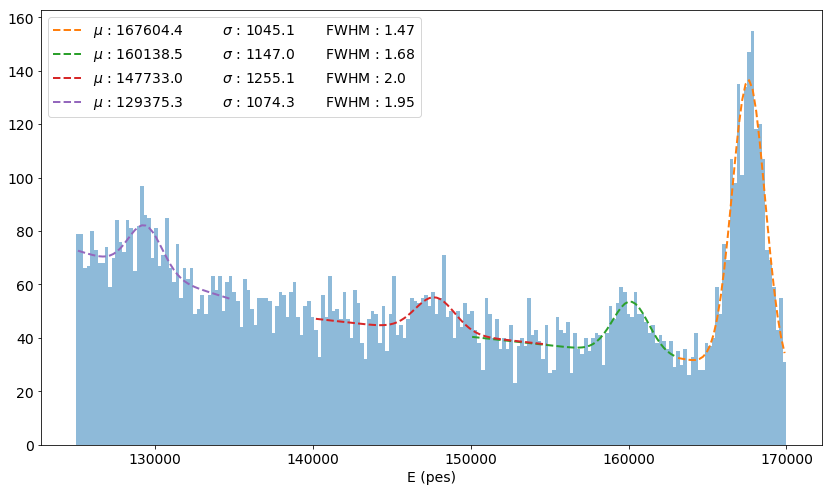

In [35]:
xEa    = hst.Vaxis((125.e3, 170e3), 200)
Erpks = ( (163.e3, 170.e3), (150.e3, 163.e3), (140.e3, 155e3), (125.e3, 135e3) )
plot_fit_multiple_peaks(xEa, Erpks, sel)

/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


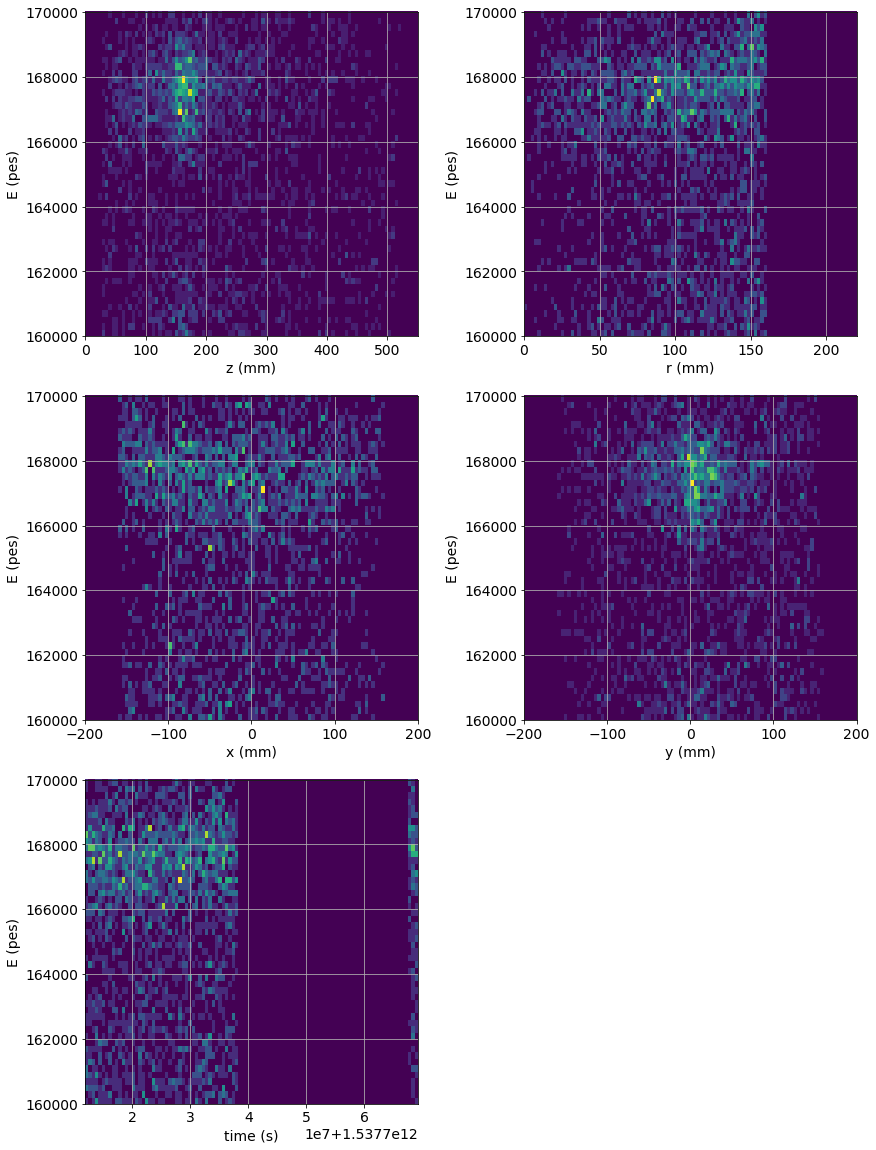

In [36]:
xEa = hst.Vaxis( (160e3, 170e3), 50)
plot_E_vs_vars(xEa, sel)

/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


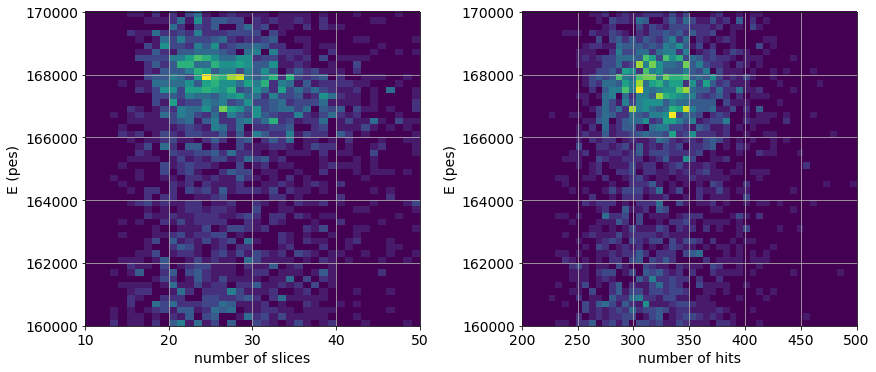

In [37]:
xEa  = hst.Vaxis( (160e3, 170e3), 50)
xNSa = hst.Vaxis( (10, 50), 40)
xNHa = hst.Vaxis( (200, 500), 50)
plot_E_vs_N(xEa, xNSa, xNHa, sel)

/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


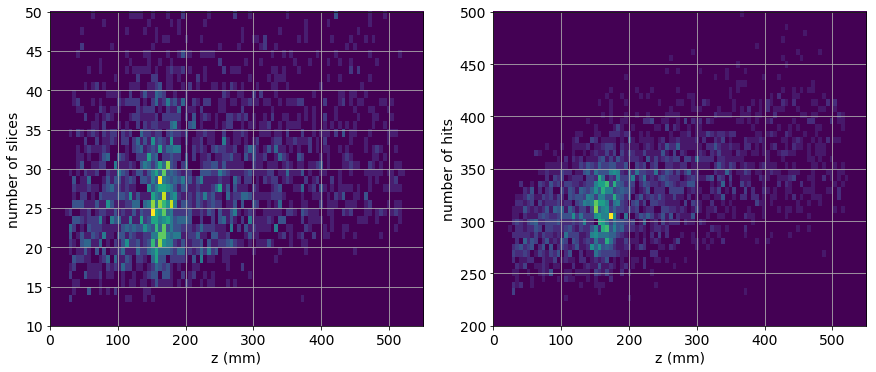

In [38]:
plot_N_vs_Z(xEa, Za, xNSa, xNHa, sel)

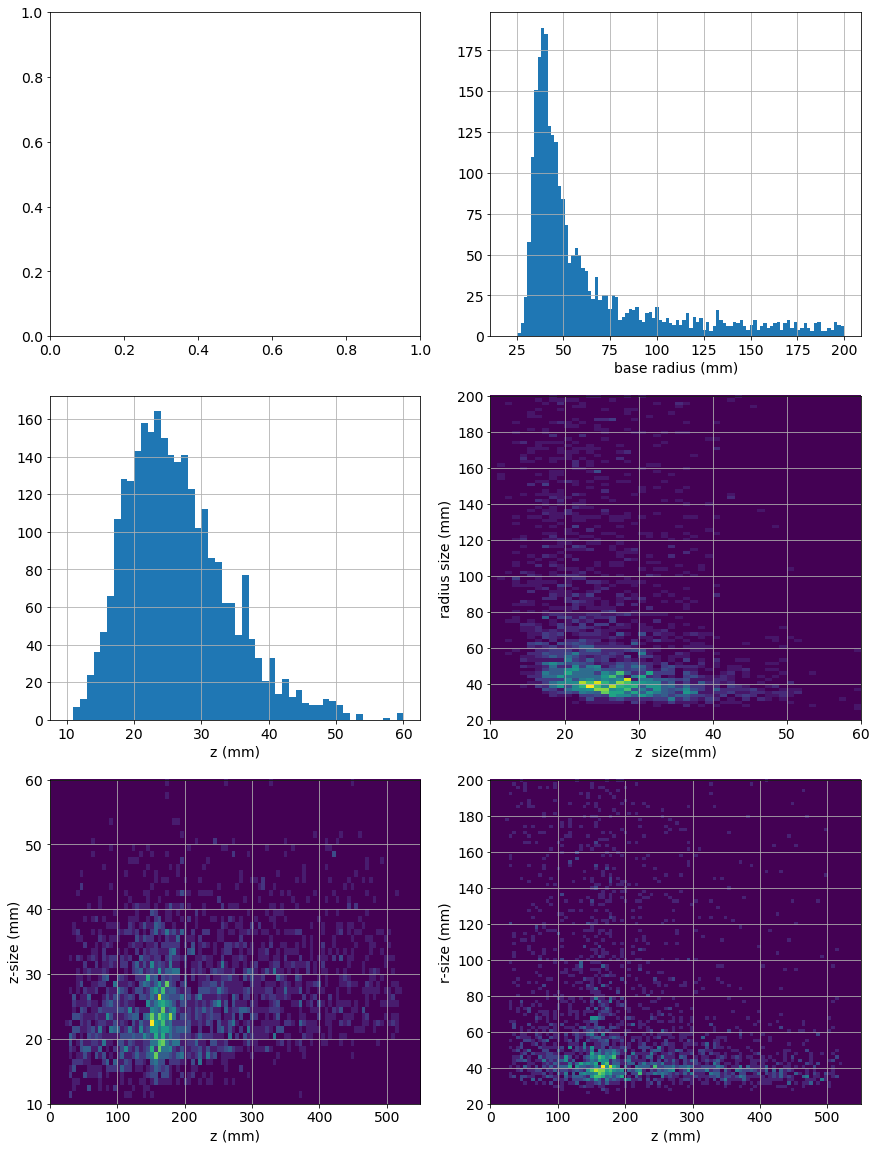

In [39]:
xRSa  = hst.Vaxis((20., 200), 100)
xZSa  = hst.Vaxis((10.,  60), 50)
plot_RS_vs_ZS(xEa, xZSa, xRSa, sel)

## Tl

$\mu$ : 407447.3	 $\sigma$ : 3680.8	 FWHM : 2.12


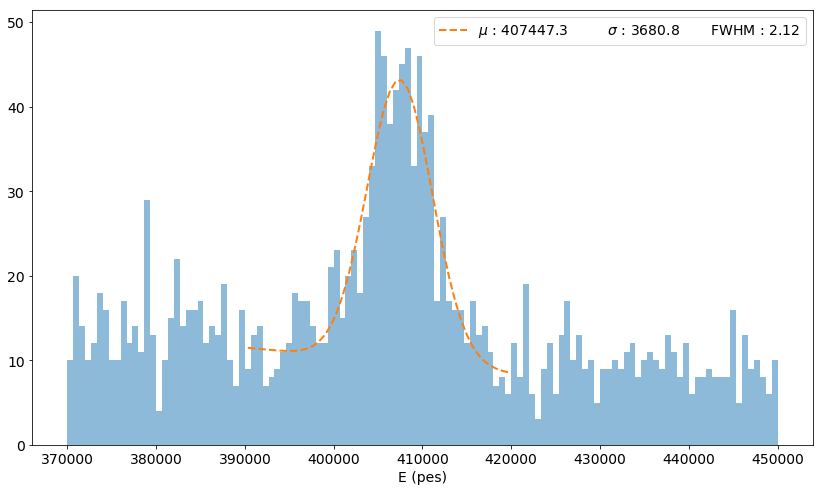

In [40]:
xEa = hst.Vaxis((370e3, 450e3), 120)
peaks = ( (390e3, 420e3), )

plot_fit_multiple_peaks(xEa, peaks, sel)


/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


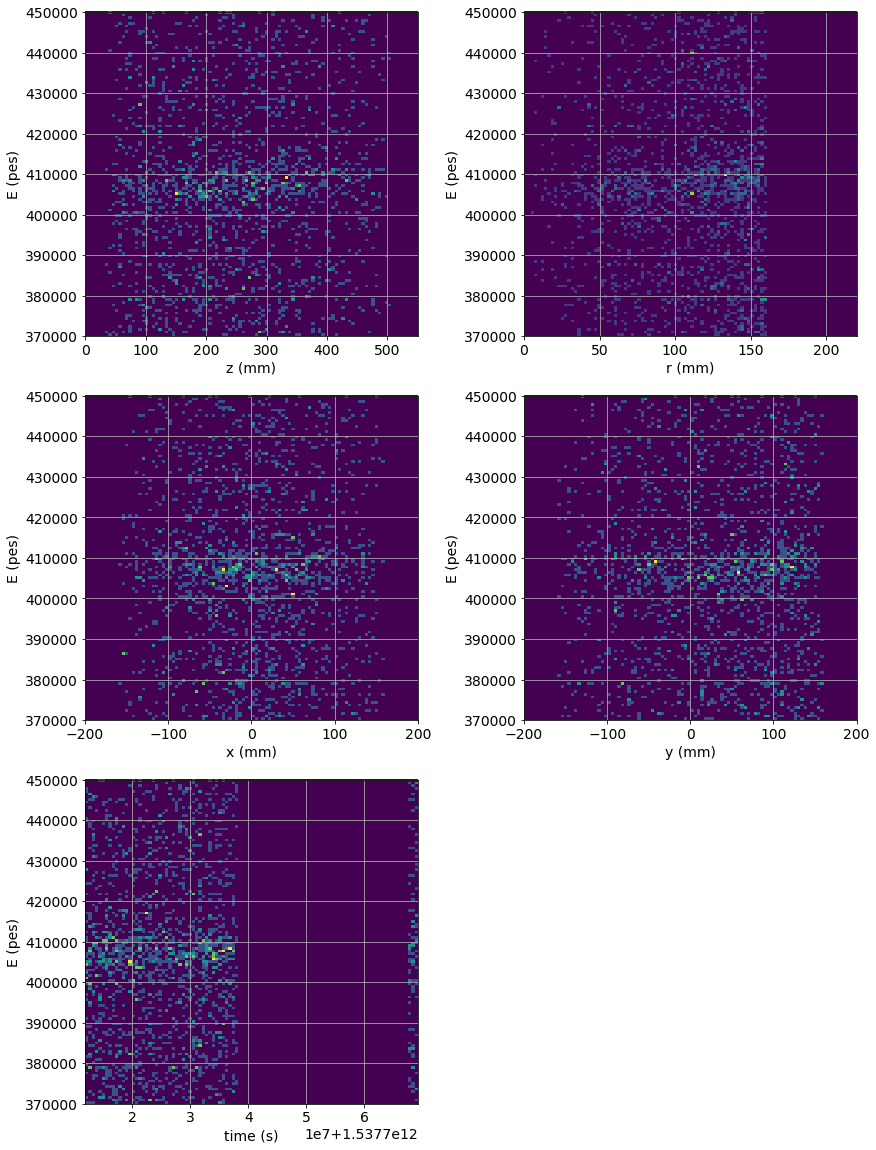

In [41]:
#xEa = hst.Vaxis( (160e3, 170e3), 50)
plot_E_vs_vars(xEa, sel)

/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


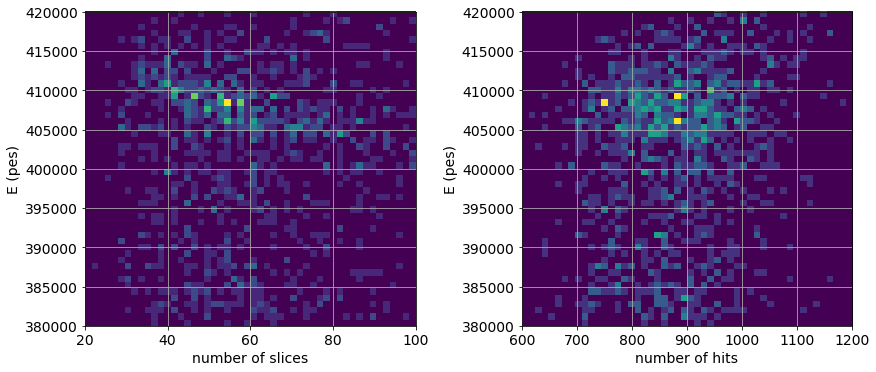

In [42]:
xEa  = hst.Vaxis( (380e3, 420e3), 50)
xNSa = hst.Vaxis( (20, 100), 50)
xNHa = hst.Vaxis( (600, 1200), 50)
plot_E_vs_N(xEa, xNSa, xNHa, sel)

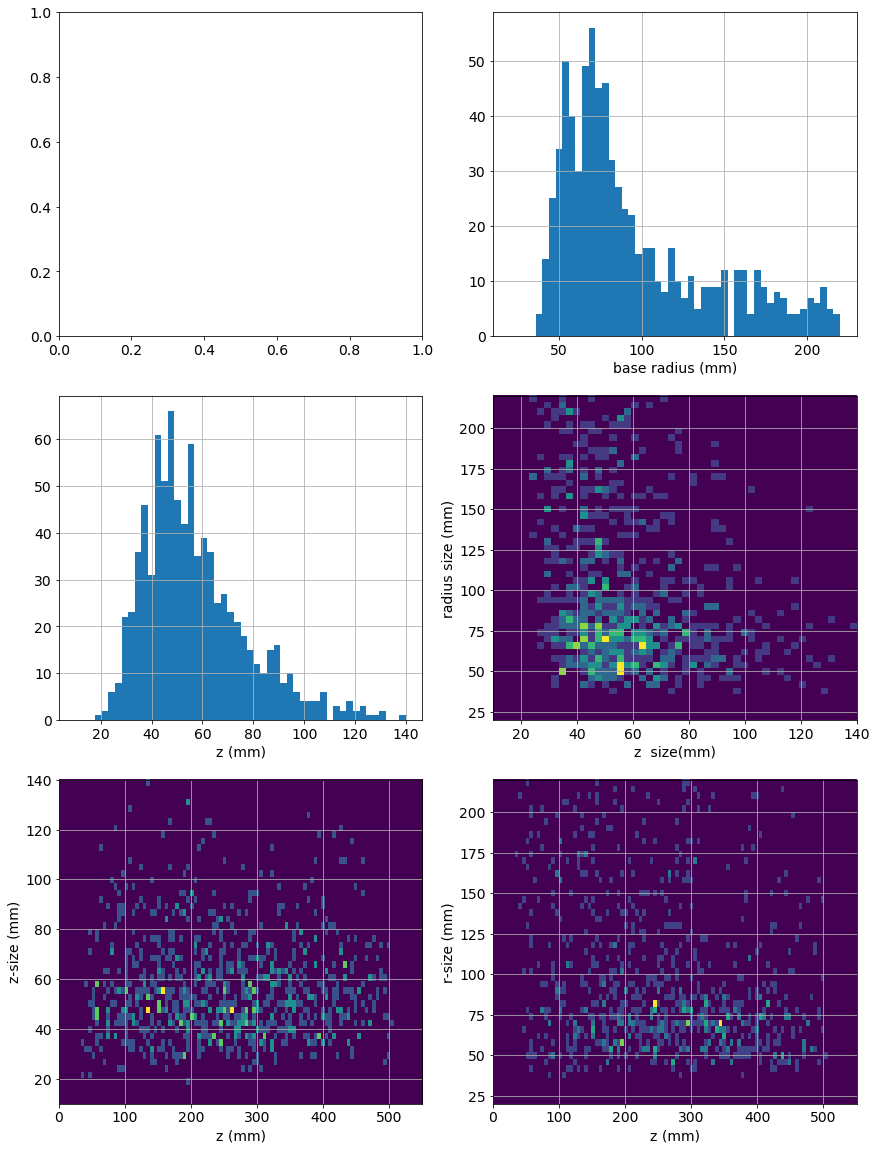

In [43]:
yEa = hst.Vaxis((350e3, 390e3), 100)
xRSa  = hst.Vaxis((20., 220), 50)
xZSa  = hst.Vaxis((10., 140), 50)
plot_RS_vs_ZS(yEa, xZSa, xRSa, sel)

/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


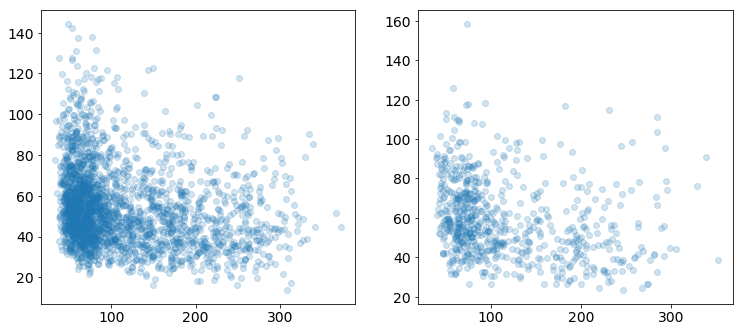

In [44]:
xsel = in_range(E, 300e3, 400e3) & sel
ysel = in_range(E, 400e3, 415e3) & sel
c = hst.Canvas(1, 2)
c(1)
plt.scatter(RS[xsel], ZS[xsel], alpha = 0.2)
c(2)
plt.scatter(RS[ysel], ZS[ysel], alpha = 0.2)

/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


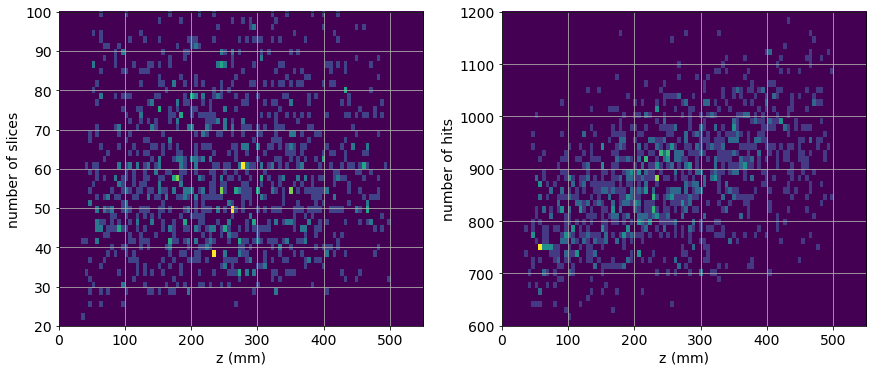

In [45]:
plot_N_vs_Z(xEa, Za, xNSa, xNHa, sel)

## Energy scale and resolution

In [46]:
dat = {'E'  :  [7250.2, 8258.2, 10215., 128488, 146621, 158676, 166380, 403914],
       'sig':  [154.4 ,  169.2,  174.2, 731,    900,    916,    866,   2565],
       'E0' :  [29.7  ,   34.0,   41.5, 510,    583,  633.9,  661.6, 1592.5]}

df = pd.DataFrame(dat)

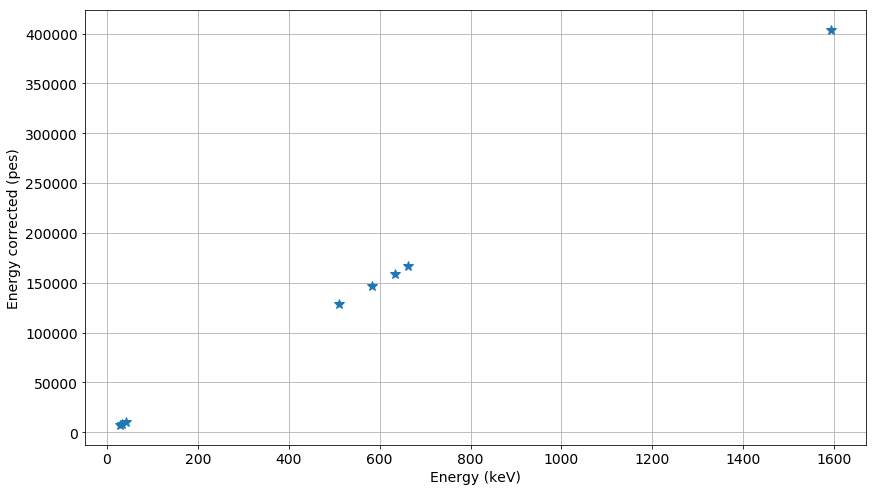

In [47]:
plt.plot(df.E0, df.E, marker='*', markersize=10, ls='')
plt.xlabel('Energy (keV)')
plt.ylabel('Energy corrected (pes)');
plt.grid();

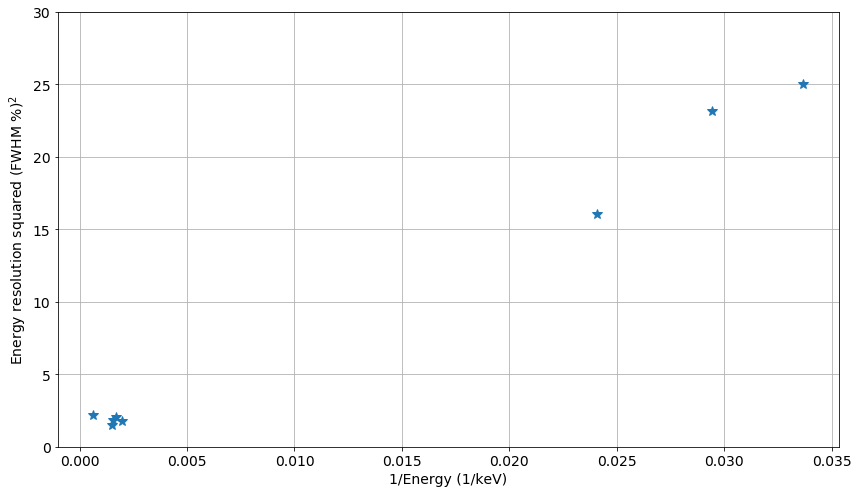

In [48]:
fwhm = 235*df.sig/df.E
plt.plot(1./df.E0, fwhm*fwhm, marker='*', markersize=10, ls='')
plt.xlabel('1/Energy (1/keV)')
plt.ylabel('Energy resolution squared (FWHM %)$^2$')
#plt.xscale('log')
plt.ylim(0., 30.)
plt.grid()